# Credit Card Fraud Detection Project

Credit card fraud is a major concern in the financial industry, costing billions of dollars annually. Detecting fraudulent transactions is a challenging problem due to the highly imbalanced nature of the data—fraudulent transactions are rare compared to legitimate ones.

This project is taken up to explore different ways of data-preprocessing, diferent machine learning techniques that can help classify transactions as fraudulent or legitimate.



In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("https://www.danielpesch.com/creditcarddata.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.linear_model import LogisticRegression

# Drop the 'Class' - that is the target variable. 1 for Fraud, 0 for Legitimate.
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Let us predict on the test set
y_pred = model.predict(X_test)

# Evaluate how good/bad it is
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9989642217618764
[[56852    12]
 [   47    51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.52      0.63        98

    accuracy                           1.00     56962
   macro avg       0.90      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Separate the dependent variable from independent variables
# Assuming 'Class' is the target variable and 'V1', 'V2', ... are the features
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into test-train
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha for desired sparsity
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
# Get the selected features (the ones who's co-efficients are not zero)
selected_features = X.columns[lasso.coef_ != 0]

In [ ]:
# Retrain the logistic regression model
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

logistic = LogisticRegression()
logistic.fit(X_train_selected, y_train)

LogisticRegression()

In [ ]:
# Make the predictions and evaluate the model
y_pred = logistic.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print them out
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:\n", report)

Accuracy: 0.9990519995786665
[[56854    10]
 [   44    54]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.formula.api as sm

In [ ]:
# Prepare the data, the train and test split and all of that.
# Assuming 'Class' is the target variable and 'V1', 'V2', ... are the features
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create a training DataFrame
train_data = pd.concat([X_train, y_train], axis=1)


In [ ]:
# Create and fit the Probit Model
formula = 'Class ~ V1 + V2 + V3 + V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27 + V28'  # Include all relevant features

# Create and fit the Probit model using the training data
model = sm.probit(formula, data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.003774
         Iterations 12


In [ ]:
# Let us make predictions and evaluate the model
# Make predictions on the test data
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(confusion_matrix)
print(report)

0.9989115550718023
[[56855     9]
 [   53    45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.46      0.59        98

    accuracy                           1.00     56962
   macro avg       0.92      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962



The accuracy is similar to the basic logistic regression model.

Now let us try Lasso + Probit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Prepare the data
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply Lasso for feature selection

# Create and fit the Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha for desired sparsity
lasso.fit(X_train, y_train)

# Get selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Create new training and testing datasets with selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Create a training DataFrame with selected features
train_data_selected = pd.DataFrame(X_train_selected, columns=selected_features)
train_data_selected['Class'] = y_train

In [ ]:
# Apply the Probit Regression

# Define the formula for the Probit model using selected features
formula_selected = 'Class ~ ' + ' + '.join(selected_features)

# Create and fit the Probit model using the training data with selected features
model_probit = sm.probit(formula_selected, data=train_data_selected).fit()

# Print the model summary
print(model_probit.summary())

Optimization terminated successfully.
         Current function value: 0.013470
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                  Class   No. Observations:               182391
Model:                         Probit   Df Residuals:                   182387
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:               0.0003338
Time:                        09:31:09   Log-Likelihood:                -2456.9
converged:                       True   LL-Null:                       -2457.7
Covariance Type:            nonrobust   LLR p-value:                    0.6502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9037      0.017   -170.072      0.000      -2.937      -2.870
V12            0.0061      0.

In [ ]:
# Make Predictions and evaluate the model

from sklearn.metrics import confusion_matrix
# Create a testing DataFrame with selected features
test_data_selected = pd.DataFrame(X_test_selected, columns=selected_features)

# Make predictions on the test data
y_pred_prob = model_probit.predict(test_data_selected)  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(confusion_matrix)
print(report)

Accuracy: 0.9982795547909132
[[56864     0]
 [   98     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Trying with a decision-tree model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Prepare the data

# Assuming 'Class' is the target variable and 'V1', 'V2', ... are the features
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply Lasso for feature selection

# Create and fit the Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha for desired sparsity
lasso.fit(X_train, y_train)

# Get selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Create new training and testing datasets with selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

In [ ]:
# Apply the Decision Tree classifier

# Create and fit the Decision Tree model
tree_model = DecisionTreeClassifier()  # You can adjust hyperparameters here
tree_model.fit(X_train_selected, y_train)

DecisionTreeClassifier()

In [ ]:
# Make the predictions and evaluate the model

# Make predictions on the test data
y_pred = tree_model.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(confusion_matrix)
print(report)

Accuracy: 0.9991397773954567
[[56842    22]
 [   27    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Prepare the data
# Assuming 'Class' is the target variable and 'V1', 'V2', ... are the features
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
# Apply the Decision Tree Classifier
tree_model = DecisionTreeClassifier()  # You can adjust hyperparameters here
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions and evaluate the model
# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(confusion_matrix)
print(report)

Accuracy: 0.9990519995786665
[[56831    33]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.79      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Lasso+Decision-Tree performs a little better than vanilla Decision-Tree classifier, in terms of accuracy.

# Using Random-Forest model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Prepare the data
# Assuming 'Class' is the target variable and 'V1', 'V2', ... are the features
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Adjust test_size and random_state as needed

# Scale the features using StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Apply Lasso feature selection
#lasso = Lasso(alpha=0.01)  # Adjust alpha for desired sparsity
#lasso.fit(X_train, y_train)

# Get selected features (non-zero coefficients)
#selected_features = X.columns[lasso.coef_ != 0]

# Create new training and testing datasets with selected features
#X_train_selected = X_train[:, lasso.coef_ != 0]
#X_test_selected = X_test[:, lasso.coef_ != 0]

In [ ]:
# Apply Random Forest Classifier
rf_model = RandomForestClassifier()  # You can adjust hyperparameters here
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier()

In [ ]:
# Make the predictions and evaluation of the model
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(confusion_matrix)
print(report)

Accuracy: 0.9982444436641972
[[56862     2]
 [   98     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



Lasso+Random Forest performs the best out of the lot. Vanilla Random Forest performs better, with the confusion-matrix. Lasso possibly stripped the important features.

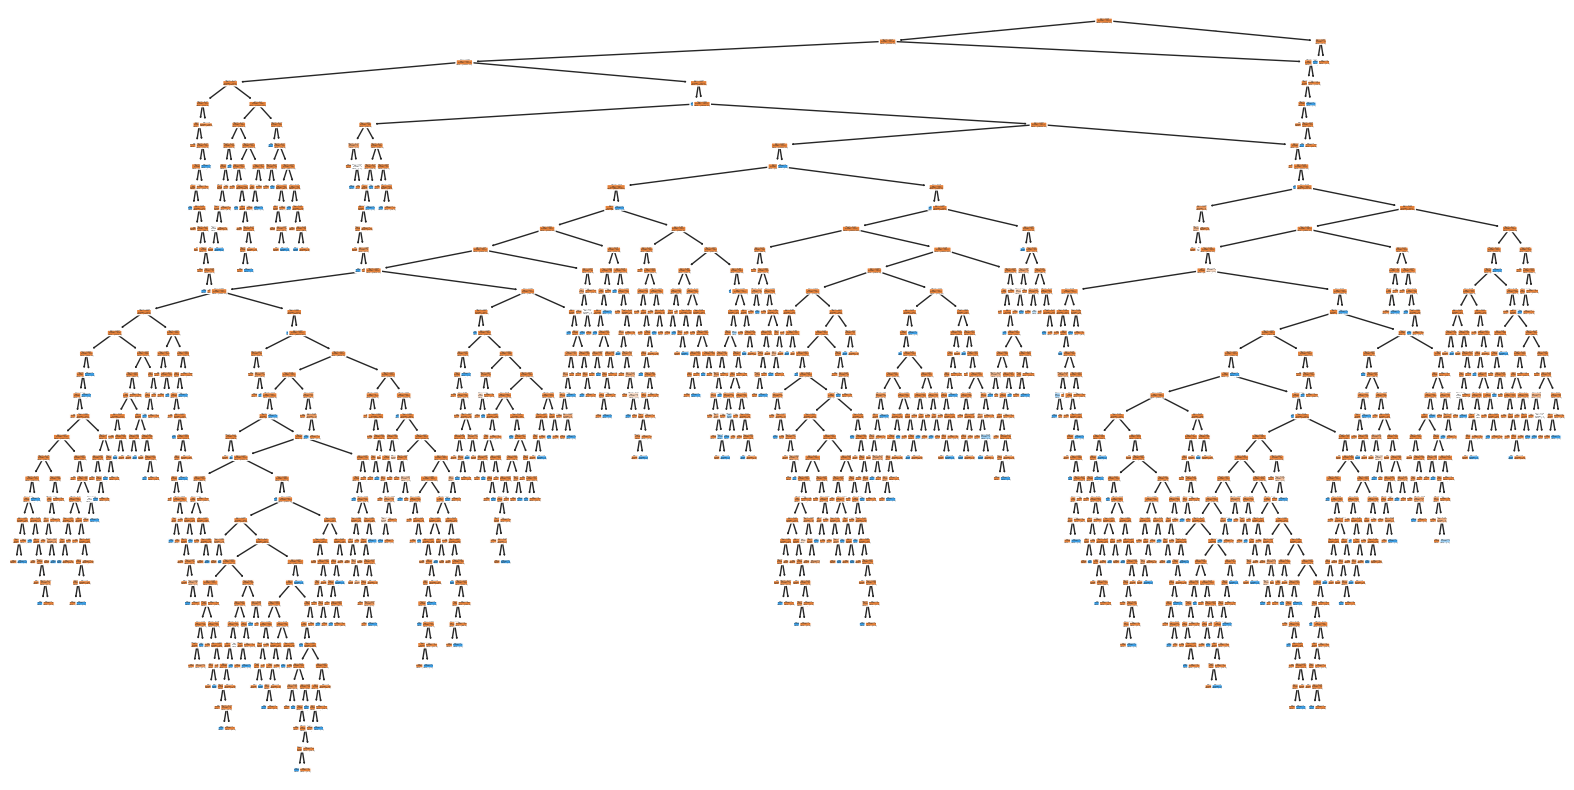

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# Access the first decision tree in the forest
tree = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

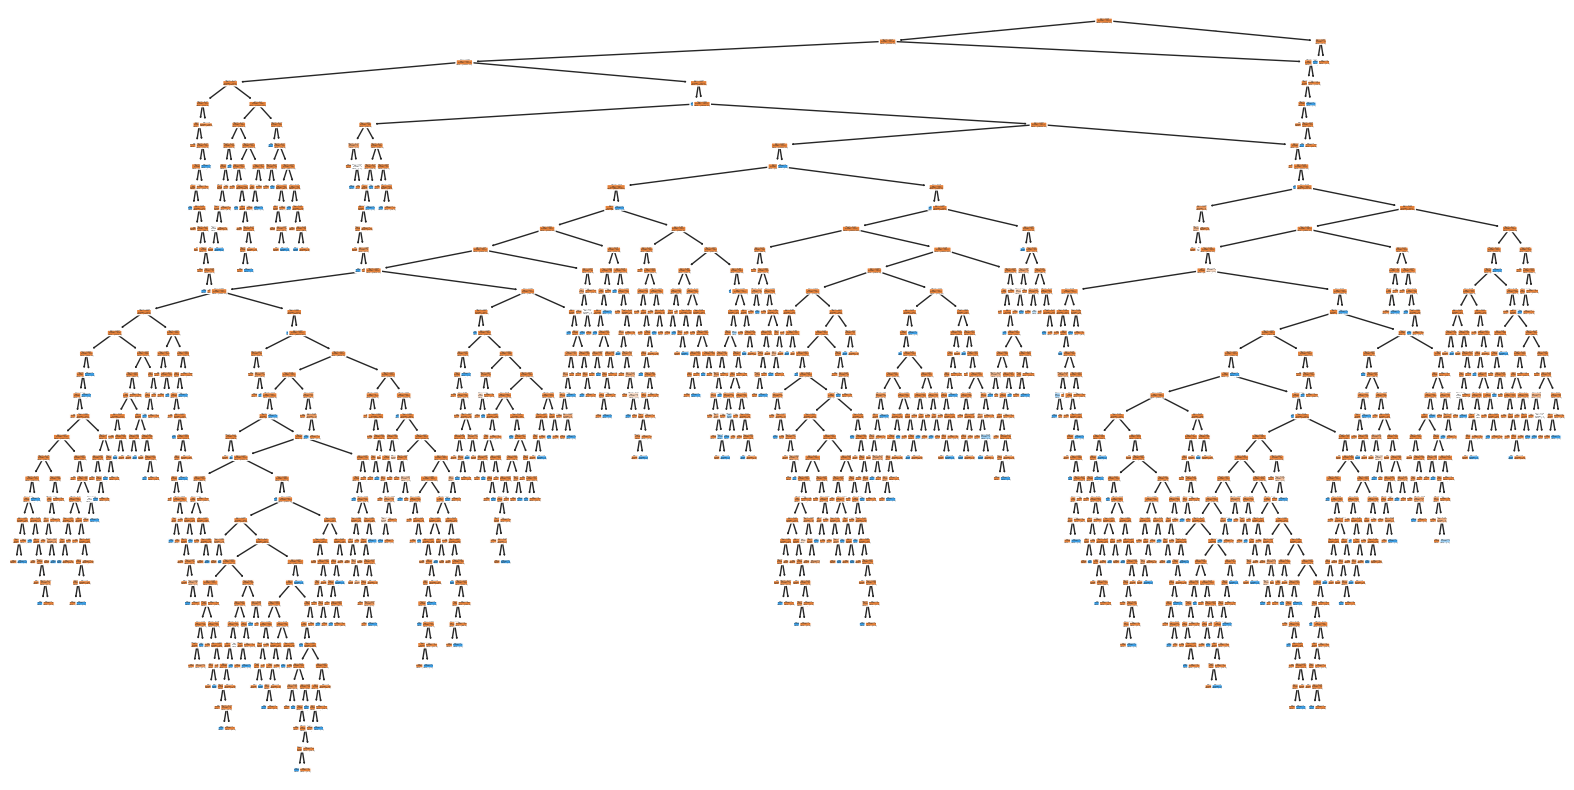

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# Access the first decision tree in the forest
tree = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()